In [1]:
import pandas as pd
import numpy as np
from operator import itemgetter
from nltk.corpus import stopwords
import re
import string
import pprint
import operator 
import json
from collections import Counter
from nltk.corpus import stopwords
from nltk import ngrams 
import string
from datetime import date
import numpy
from matplotlib import pyplot

In [2]:
df_raw  = pd.read_csv('twitter-post.fb20830f.drain.compact.csv')

# Data First Look

In [3]:
df_raw.shape

(798, 44)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 44 columns):
id                                798 non-null int64
url                               798 non-null object
channel                           798 non-null object
author.id                         798 non-null int64
author.alias                      798 non-null object
author.name                       798 non-null object
author.url                        798 non-null object
author.picture.type               798 non-null object
author.picture.url                798 non-null object
language                          798 non-null object
origin                            798 non-null object
inReplyTo.id                      18 non-null float64
inReplyTo.url                     18 non-null object
inReplyTo.author.id               18 non-null float64
inReplyTo.author.alias            18 non-null object
inReplyTo.author.url              18 non-null object
inReplyTo.channel                 18

In [5]:
df_raw.head()

,id,url,channel,author.id,author.alias,author.name,author.url,author.picture.type,author.picture.url,language,...,tags.0.value,links.0.url,links.0.text,mediaMentions.0.id,mediaMentions.0.type,mediaMentions.0.url,accountMentions.0.id,accountMentions.0.alias,accountMentions.0.name,accountMentions.0.url
0,930160944533135360,http://twitter.com/bajohnsonrn/status/93016094...,twitter,898212382052421632,bajohnsonrn,Brittany Johnson,http://twitter.com/bajohnsonrn,image,http://pbs.twimg.com/profile_images/9029013236...,en,...,NaN,https://t.co/NZoNRlnjdz,bit.ly/2y6TfRY,NaN,NaN,NaN,1.406255e+07,MDAndersonNews,MD Anderson Cancer Center,http://twitter.com/MDAndersonNews
1,980419271401590788,http://twitter.com/marshyswife/status/98041927...,twitter,276592869,marshyswife,Pauline Marsh,http://twitter.com/marshyswife,image,http://pbs.twimg.com/profile_images/8039612011...,en,...,london,NaN,NaN,NaN,NaN,NaN,1.286881e+09,RayHoldenUrban,RayHolden,http://twitter.com/RayHoldenUrban
2,948962051891789826,http://twitter.com/louisianagill/status/948962...,twitter,23515704,louisianagill,Gillian Parrish,http://twitter.com/louisianagill,image,http://pbs.twimg.com/profile_images/9483805470...,en,...,chordoma,https://t.co/iUuKMLybYV,bit.ly/2E6KFWK,NaN,NaN,NaN,4.478353e+07,ChordomaFDN,Chordoma Foundation,http://twitter.com/ChordomaFDN
3,961246362800095232,http://twitter.com/DrNTheodore/status/96124636...,twitter,900737435654664193,DrNTheodore,"Nicholas Theodore,MD",http://twitter.com/DrNTheodore,image,http://pbs.twimg.com/profile_images/9015211584...,en,...,NaN,NaN,NaN,NaN,NaN,NaN,8.976179e+17,maciejlesniakmd,"Maciej Lesniak, MD",http://twitter.com/maciejlesniakmd
4,936909701790306305,http://twitter.com/bhas_dr/status/936909701790...,twitter,4327691963,bhas_dr,"DrGeethanjaliBhas,MD MBA",http://twitter.com/bhas_dr,image,http://pbs.twimg.com/profile_images/1059420706...,en,...,NaN,NaN,NaN,NaN,NaN,NaN,4.557773e+07,JMGardnerMD,"Jerad Gardner, MD",http://twitter.com/JMGardnerMD


# Unique Authors

<b>Question: </b>
How many unique authors are present in the file?  

<b>Answer: </b> 654

Each of the author identifiers has a count of 654 except "author.name" which has a count of 653.  It has a lower count because a "." is used for "author.name" for two different author ids.

In [6]:
len(set(df_raw['author.id']))

654

In [7]:
len(set(df_raw['author.url']))

654

In [8]:
len(set(df_raw['author.alias']))

654

In [9]:
len(set(df_raw['author.name']))

653

In [10]:
list_id = df_raw.drop_duplicates('author.id')['id']
list_name = df_raw.drop_duplicates('author.name')['id']
id_dup = list(set(list_id)-set(list_name))[0]
df_raw.loc[df_raw['id'] == id_dup]['author.name']

657    .
Name: author.name, dtype: object

In [11]:
df_no_auth_dup = df_raw.drop_duplicates('author.id')
df_no_auth_dup.loc[df_no_auth_dup['author.name'] == '.'][['id','author.name']]

,id,author.name
545,981379871728336897,.
657,981185467877085184,.


# Frequent Words

<b>Question: </b>What are the most frequently used words?  Tell me something about those words. Compare word usage to the top hashtags.

<b>Answer: </b>

Most Frequently Used Words:
- chondrosarcoma: 466
- cancer: 419
- old: 383
- years: 377
- name: 373


Most Frequently Used Hashtags:
- #london: 92
- #liverpool: 92
- #chondrosarcoma: 80
- #cancer: 59
- #chordoma: 52

The most frequently used words are all part of the same tweet (367 occurrences, roughly 46% of the data set):

>RT @Ms_Tsetse: Her Name is Nontokozo Maphaphu. She is 19 yrs old. She has spinal cancer called "Chondrosarcoma"\n\nAl she wants is to go back…'

3 (#chondrosarcoma, #cancer, and #chordoma) of the top 5 hashtags are subjects in the tweet and therefore are related to the tweet.

The 2 remaining hashtags do occur often with the #chondrosarcoma hashtag.  This indicates that many of the tweets with the #london and #liverpool hashtags are also related to an aspect of the tweet above.


In [12]:
regex_str = [
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via', '…']
 
def tokenize(s):
    return tokens_re.findall(s)

def normalize(s):
    norm_dict = {
        'yrs':'years'
    }
    for k, v in norm_dict.items():
        normed = s.replace(k,v)
    return normed
        
def preprocess(s):
    normed = normalize(s.lower())
    tokens = tokenize(normed) 
    return tokens

def get_counts(tweets, grams=3, stop=stop):
    # set up counters 
    counters={}
    counters['all'] = Counter()
    counters['terms'] = Counter()
    counters['ngrams'] = Counter()
    counters['hashtags'] = Counter()
    counters['mentions'] = Counter()
    # get counts
    for tweet in df_raw['body']:
        # list with all terms
        terms_all = [term for term in preprocess(tweet)]
        counters['all'].update(terms_all)
        # count terms (no hashtags, no mentions)
        terms_only = [term for term in preprocess(tweet) 
                      if term not in stop and
                      not term.startswith(('#', '@'))] 
        counters['terms'].update(terms_only)
        # count ngrams
        terms_bigram = ngrams(terms_only,grams)
        counters['ngrams'].update(terms_bigram)
        # count hashtags
        terms_hash = [term for term in preprocess(tweet) 
                      if term.startswith('#')]
        counters['hashtags'].update(terms_hash)
        # count mentions
        terms_mention = [term for term in preprocess(tweet) 
                      if term.startswith('@')]
        counters['mentions'].update(terms_mention)
    return counters

def get_co_occurence(search_word, tweets):
    count_search = Counter()
    for tweet in tweets:
        terms_all = [term for term in preprocess(tweet)
                    if term not in stop]
        if search_word.lower() in terms_all:
            terms_all.remove(search_word.lower())
            count_search.update(terms_all)
    return count_search

In [13]:
term_counters = get_counts(df_raw['body'])

In [14]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(term_counters['terms'].most_common(5))

[   ('chondrosarcoma', 466),
    ('cancer', 419),
    ('old', 383),
    ('years', 377),
    ('name', 373)]


In [15]:
pp.pprint(term_counters['hashtags'].most_common(5))

[   ('#london', 92),
    ('#liverpool', 92),
    ('#chondrosarcoma', 80),
    ('#cancer', 59),
    ('#chordoma', 52)]


In [16]:
pp.pprint(term_counters['ngrams'].most_common(5))

[   (('name', 'nontokozo', 'maphaphu'), 367),
    (('nontokozo', 'maphaphu', '19'), 367),
    (('maphaphu', '19', 'years'), 367),
    (('19', 'years', 'old'), 367),
    (('years', 'old', 'spinal'), 367)]


In [17]:
term_counters_8gram = get_counts(df_raw['body'], 8)
pp.pprint(term_counters_8gram['ngrams'].most_common(2))

[   (   (   'name',
            'nontokozo',
            'maphaphu',
            '19',
            'years',
            'old',
            'spinal',
            'cancer'),
        367),
    (   (   'nontokozo',
            'maphaphu',
            '19',
            'years',
            'old',
            'spinal',
            'cancer',
            'called'),
        367)]


In [18]:
len(df_raw.loc[df_raw['body'].str.contains('Nontokozo')]['body'])

367

In [19]:
set(df_raw.loc[df_raw['body'].str.contains('Nontokozo')]['body'])

{'RT @Ms_Tsetse: Her Name is Nontokozo Maphaphu. She is 19 yrs old. She has spinal cancer called "Chondrosarcoma"\n\nAl she wants is to go back…'}

In [20]:
co_occ_london = get_co_occurence('#London',df_raw['body'])
co_occ_london.most_common(10)

[('days', 96),
 ('support', 90),
 ('#liverpool', 89),
 ('walking', 82),
 ('april', 77),
 ('225', 72),
 ('wife', 68),
 ('please', 55),
 ('#chondrosarcoma', 52),
 ('daughter', 50)]

# Top Mentions

<b>Question: </b>
What are the top accounts gettings @mentioned? 

<b>Answers: </b>
- @ms_tsetse: 367
- @chordomafdn: 42
- @rayholdenurban: 36
- @jmgardnermd: 19
- @histiocytosisx: 18

In [21]:
pp.pprint(term_counters['mentions'].most_common(5))

[   ('@ms_tsetse', 367),
    ('@chordomafdn', 42),
    ('@rayholdenurban', 36),
    ('@jmgardnermd', 19),
    ('@histiocytosisx', 18)]


# Graphs
<b>Question: </b>
Show me an interesting histogram or chart from this data. 

<b>Answer: </b>
A histogram of tweet frequency by date shows a jump in tweets at the beginning of April 2018.  There is also a jump in "chondrosarcoma" in the body of tweets at the same time.  "@ms_tsetse" mentions increases at the same time as well but for a shorter period of time.


In [22]:
# create a list of date objects from 'createdAt'
def get_sorted_dates(tweets_created):
    dates = []
    for t in tweets_created:
        date_str = t.split('T')[0]
        year, month, day = [int(i) for i in date_str.split('-')]
        d = date(year, month, day)
        dates.append(d)
    dates.sort()
    min_date = dates[0]
    max_date = dates[-1]
    length = (max_date-min_date).days+1
    return dates

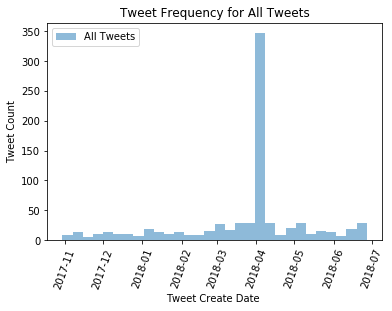

In [23]:
dates_all = get_sorted_dates(df_raw['createdAt'])
pyplot.hist(dates_all, 30, alpha=0.5, label='All Tweets')
pyplot.legend(loc='upper left')
pyplot.xticks(rotation = 70)
pyplot.title('Tweet Frequency for All Tweets')
pyplot.ylabel('Tweet Count')
pyplot.xlabel('Tweet Create Date ')
pyplot.show()

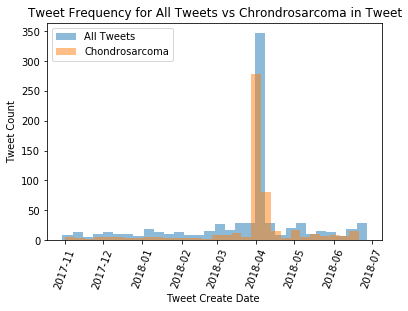

In [24]:
dates_chondro_raw = df_raw.loc[df_raw['body'].str.contains('chondrosarcoma',
                                            flags=re.IGNORECASE,
                                            regex=True)]['createdAt']
dates_chondro = get_sorted_dates(dates_chondro_raw)
x = dates_all
y = dates_chondro
bins = 30
pyplot.hist(x, bins, alpha=0.5, label='All Tweets')
pyplot.hist(y, bins, alpha=0.5, label='Chondrosarcoma')
pyplot.legend(loc='upper left')
pyplot.xticks(rotation = 70)
pyplot.title('Tweet Frequency for All Tweets vs Chrondrosarcoma in Tweet')
pyplot.ylabel('Tweet Count')
pyplot.xlabel('Tweet Create Date ')
pyplot.show()

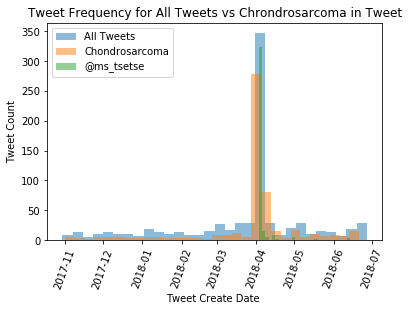

In [25]:
dates_tsetse_raw = df_raw.loc[df_raw['body'].str.contains('@ms_tsetse',
                                            flags=re.IGNORECASE,
                                            regex=True)]['createdAt']
dates_tsetse = get_sorted_dates(dates_tsetse_raw)
x = dates_all
y = dates_chondro
z = dates_tsetse
bins = 30
pyplot.hist(x, bins, alpha=0.5, label='All Tweets')
pyplot.hist(y, bins, alpha=0.5, label='Chondrosarcoma')
pyplot.hist(z, bins, alpha=0.5, label='@ms_tsetse')
pyplot.legend(loc='upper left')
pyplot.xticks(rotation = 70)
pyplot.title('Tweet Frequency for All Tweets vs Chrondrosarcoma in Tweet')
pyplot.ylabel('Tweet Count')
pyplot.xlabel('Tweet Create Date ')
pyplot.show()

# About

<b>Question: </b>
What do you think this data set is about?
    
<b>Answer: </b>
This data set is about a request for charity that went viral near the beginning of April 2018.
    